In [26]:
#-------Set up environment--------
options(warn = -1, verbose=FALSE)


#Load packages
library(Seurat)
library(dplyr)
library(MAST)
library(cowplot)
library(stringi) #string manipulation such as stri_sub
library(dplyr) #data manipulation library
library(ggplot2)
library(readr)
library(cowplot)
library(pheatmap)
library(scales)
library(unixtools)
ulimit::memory_limit(50000)
setwd("/data/2320454f/jupyter-2320454f/BIORRA")
#set.tempdir("/data/2320454f/td")

soft  hard 
50000   Inf

In [27]:
#Load in dataset
mb <- readRDS("mb.rds")

In [28]:
#Order remission states
mb$remission.state<-as.factor(ordered(mb$remission.state, levels=c("Baseline Remission (Sustained Remission Endpoint)", "Baseline Remission (Flare Endpoint)", "Sustained Remission", "Flare")))

In [29]:
Idents(mb)<-"celltype" 

In [30]:
setwd("/data/2320454f/jupyter-2320454f/BIORRA/FinalRevision2Analysis/BasedonAllDCDE")

# Isolate All DCs Irrespective of Timepoint

In [31]:
Idents(mb)<-"celltype"
dc<-subset(mb, idents = c('CD163 CD1c Low Dendritic Cells', 'IRF4hi CD163 CD1c Dendritic Cells', 'CD1c High Dendritic Cells'))

# Get Baseline Flare DE Genes

In [32]:
DefaultAssay(dc) <- "RNA"

Idents(dc)<-'remission.state'

#Run the standard workflow for visualization and clustering
dc <- FindVariableFeatures(dc)
dc <- ScaleData(object = dc, verbose  = FALSE)

#Baseline to Flare Analysis Pipeline
dc.markersBF <- FindMarkers(object = dc, ident.1="Baseline Remission (Flare Endpoint)", ident.2='Baseline Remission (Sustained Remission Endpoint)', only.pos = TRUE, logfc.threshold = 0.25)
dc.markersBF <- dc.markersBF[which(dc.markersBF$p_val_adj<0.05),]
write.csv(dc.markersBF, "dc.markersBF.csv")
top20BF <- head(dc.markersBF[order(dc.markersBF$avg_log2FC, decreasing=T),],n=20)
top20BF$gene<-rownames(top20BF)
top20BF$cluster<-"BF"
dc.markersBF$cluster<-'BF'

In [33]:
length(rownames(dc.markersBF))

[1] 33

In [34]:
dc.markersBF

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ITGB2,2.462788e-68,0.3554518,1.000,1.000,1.083627e-65,BF
F13A1,2.904153e-50,1.2556898,0.655,0.452,1.277827e-47,BF
LGALS3,2.297955e-49,0.6915502,0.887,0.802,1.011100e-46,BF
FCER1A,6.637565e-34,0.4575966,0.978,0.978,2.920529e-31,BF
CD36,6.658322e-33,0.7367710,0.648,0.462,2.929662e-30,BF
ITGAM,1.735841e-25,0.7465447,0.497,0.334,7.637703e-23,BF
BIN2,6.098924e-25,0.5595309,0.739,0.640,2.683527e-22,BF
RNASE6,5.393758e-23,0.3212767,0.972,0.933,2.373253e-20,BF
CD9,2.103247e-22,1.2386924,0.128,0.026,9.254287e-20,BF


# Get Endpoint Flare DE Genes

In [35]:
DefaultAssay(dc) <- "RNA"

Idents(dc)<-'remission.state'

#Baseline to Flare Analysis Pipeline
dc.markersEndpointFlare <- FindMarkers(object = dc, ident.1="Flare", ident.2='Sustained Remission', only.pos = TRUE, logfc.threshold = 0.25)
dc.markersEndpointFlare <- dc.markersEndpointFlare[which(dc.markersEndpointFlare$p_val_adj<0.05),]
write.csv(dc.markersEndpointFlare, "dc.markersEndpointFlare.csv")
top20BF <- head(dc.markersEndpointFlare[order(dc.markersEndpointFlare$avg_log2FC, decreasing=T),],n=20)
top20BF$gene<-rownames(top20BF)
top20BF$cluster<-"BF"
dc.markersEndpointFlare$cluster<-'BF'

In [36]:
length(rownames(dc.markersEndpointFlare))

[1] 37

In [37]:
dc.markersEndpointFlare

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ITGB2,1.523907e-74,0.3923197,1.000,1.000,6.705192e-72,BF
F13A1,3.288003e-54,1.3143532,0.669,0.441,1.446721e-51,BF
S100A12,4.020285e-34,1.2168057,0.731,0.563,1.768926e-31,BF
CD63,8.254111e-34,0.4451260,0.986,0.962,3.631809e-31,BF
LGALS3,5.928028e-30,0.5585978,0.891,0.834,2.608332e-27,BF
CD14,3.950098e-28,1.1476285,0.705,0.554,1.738043e-25,BF
IFITM2,5.729318e-25,0.3991548,0.986,0.985,2.520900e-22,BF
ITGAM,1.129757e-23,0.7582466,0.518,0.361,4.970933e-21,BF
FCN1,6.317732e-20,0.5687176,0.922,0.874,2.779802e-17,BF


In [38]:
intersect(rownames(dc.markersBF), rownames(dc.markersEndpointFlare))

[1] "ITGB2"   "F13A1"   "LGALS3"  "CD36"    "ITGAM"   "BIN2"    "CD9"    
 [8] "CX3CR1"  "S100A12" "FCN1"    "CD63"    "LAMP1"   "CD14"    "CLEC4E" 
[15] "CD163"   "TLR2"    "RNASE2"  "JUN"     "MGST1"   "SNCA"    "NKG7"   
[22] "QPCT"    "CTSD"    "S100A9"

In [39]:
length(intersect(rownames(dc.markersBF), rownames(dc.markersEndpointFlare)))

[1] 24

In [40]:
#Create Geneset by taking genes which are commonly DE
dcflareset<-intersect(rownames(dc.markersBF), rownames(dc.markersEndpointFlare))

In [41]:
dcflareset

[1] "ITGB2"   "F13A1"   "LGALS3"  "CD36"    "ITGAM"   "BIN2"    "CD9"    
 [8] "CX3CR1"  "S100A12" "FCN1"    "CD63"    "LAMP1"   "CD14"    "CLEC4E" 
[15] "CD163"   "TLR2"    "RNASE2"  "JUN"     "MGST1"   "SNCA"    "NKG7"   
[22] "QPCT"    "CTSD"    "S100A9"

# Add Module Score of Flare DE Geneset to DC Object

In [42]:
dc<-AddModuleScore(dc, features=list(dcflareset), ctrl=10, name='DC Flare Module Score', pool=TRUE)

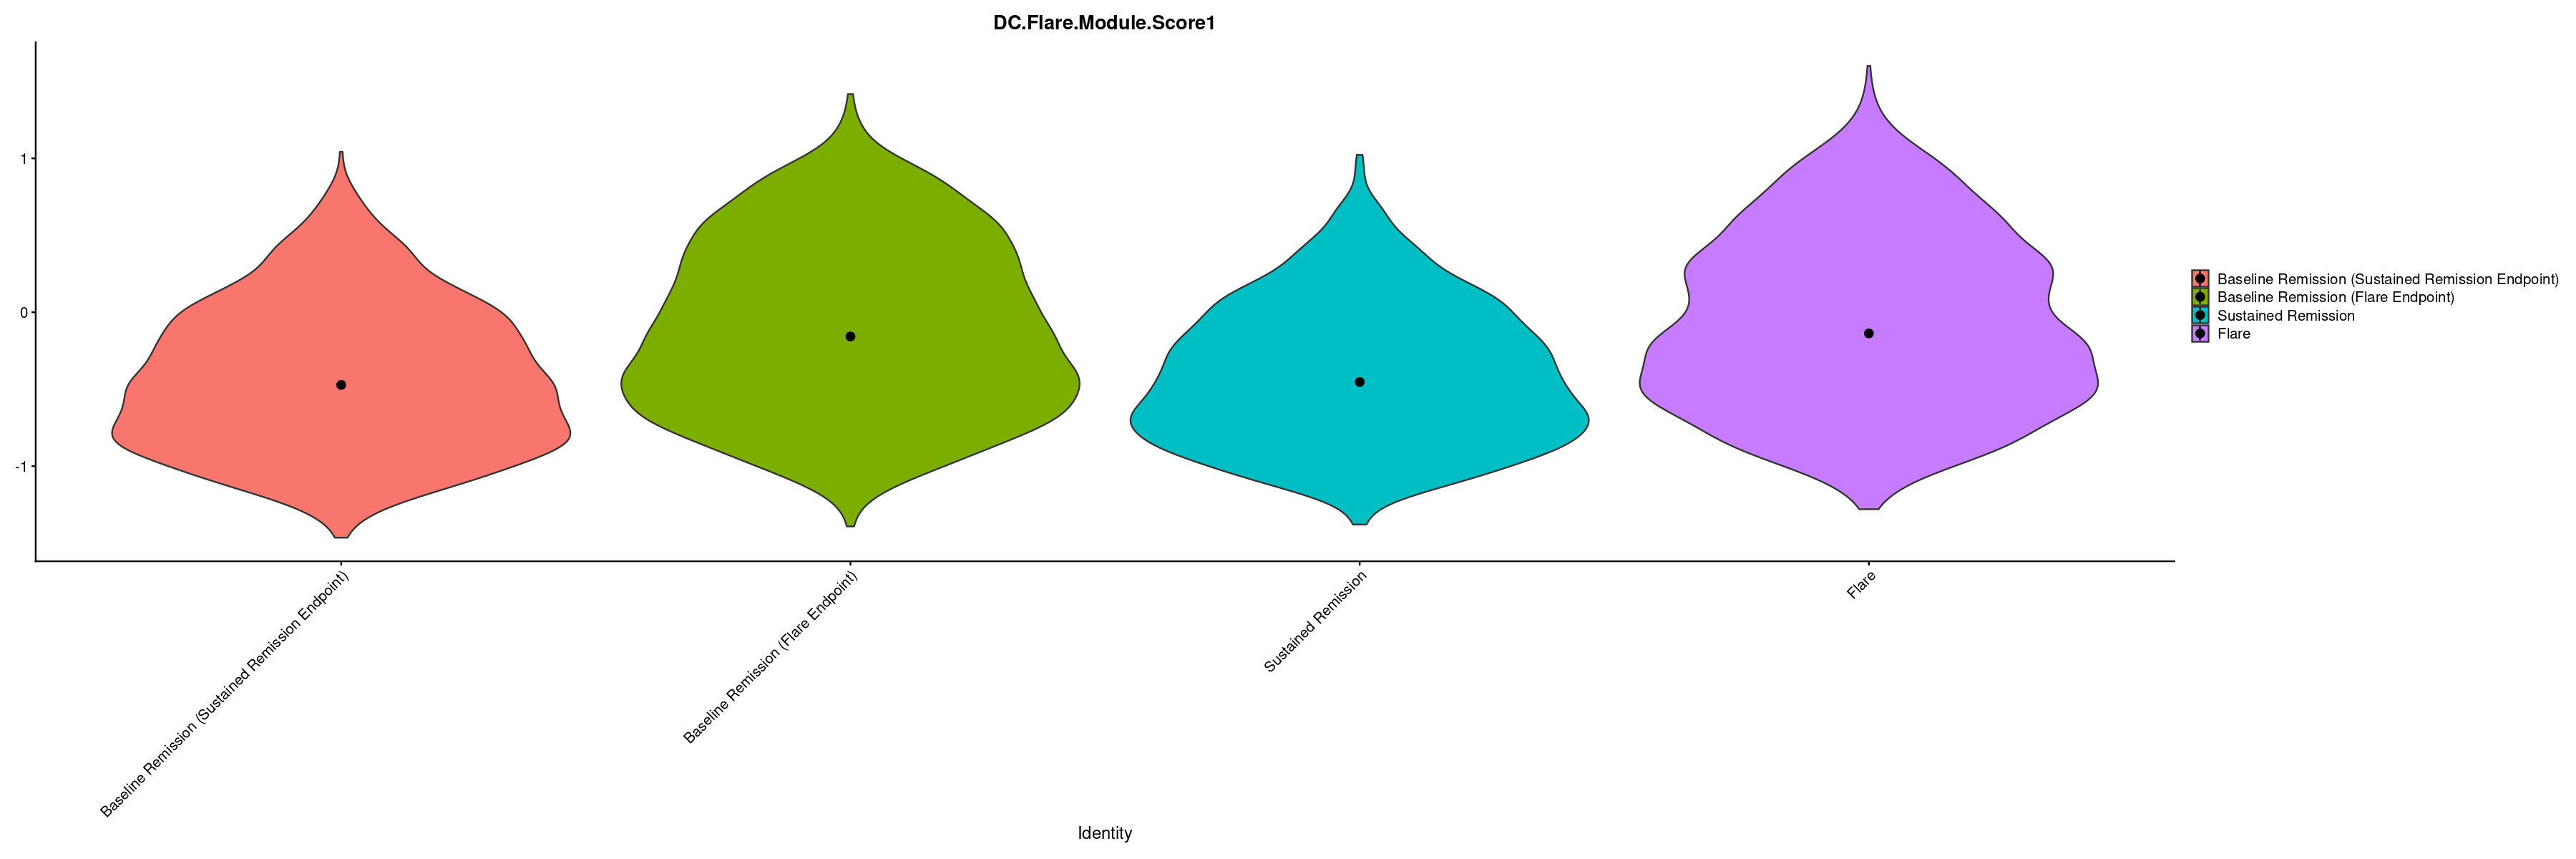

In [43]:
Idents(dc)<-'remission.state'
VlnPlot(dc, features='DC.Flare.Module.Score1', pt.size=0)+stat_summary(fun.y=median)

In [41]:
(dcflareset)

[1] "ITGB2"   "F13A1"   "S100A12" "CD63"    "LGALS3"  "CD14"    "ITGAM"  
 [8] "FCN1"    "LAMP1"   "CLEC4E"  "S100A9"  "RNASE2"  "NKG7"    "CD163"  
[15] "CD36"    "MGST1"   "TLR2"    "BIN2"    "CTSD"    "CX3CR1"  "CD9"    
[22] "QPCT"    "JUN"     "SNCA"    "TSPAN32"

# Test New Geneset on iDC3

In [45]:
Idents(mb)<-'celltype'
idc3<-subset(mb, idents='CD163 CD1c Low Dendritic Cells')

#Run the standard workflow for visualization and clustering
idc3 <- FindVariableFeatures(idc3)
idc3 <- ScaleData(object = idc3, verbose  = FALSE)

idc3<-AddModuleScore(idc3, features=list(dcflareset), ctrl=10, name='DC Flare Module Score', pool=TRUE)

In [47]:
Idents(idc3)<-'paper'
matrix<-FetchData(idc3, vars=c('DC.Flare.Module.Score1', 'paper'))
matrix

,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
729064_1,-0.016626470,Baseline Remission (Flare Endpoint)_BRA737
283050_1,-0.238625858,Baseline Remission (Flare Endpoint)_BRA737
334437_1,0.095397346,Baseline Remission (Flare Endpoint)_BRA737
152193_1,-0.452467421,Baseline Remission (Flare Endpoint)_BRA737
530216_1,0.253698705,Baseline Remission (Flare Endpoint)_BRA737
681478_1,-0.523382831,Baseline Remission (Flare Endpoint)_BRA737
425636_1,-0.269415046,Baseline Remission (Flare Endpoint)_BRA737
609322_1,0.067123412,Baseline Remission (Flare Endpoint)_BRA737
809313_1,0.407834221,Baseline Remission (Flare Endpoint)_BRA737


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [48]:
rownames(matrix)<-NULL
head(matrix)

In [49]:
averageidc3mod<-tapply(matrix$DC.Flare.Module.Score1, matrix$paper, mean)

In [50]:
write.csv(averageidc3mod, '/data/2320454f/jupyter-2320454f/BIORRA/FinalRevision2Analysis/BasedonAllDCDE/After Changing DC Geneset Module Score/idc3mod.csv')

# Test New Geneset on DC3

In [53]:
Idents(mb)<-'celltype'
dc3<-subset(mb, idents='IRF4hi CD163 CD1c Dendritic Cells')

#Run the standard workflow for visualization and clustering
dc3 <- FindVariableFeatures(dc3)
dc3 <- ScaleData(object = dc3, verbose  = FALSE)

dc3<-AddModuleScore(dc3, features=list(dcflareset), ctrl=10, name='DC Flare Module Score', pool=TRUE)

In [54]:
Idents(dc3)<-'paper'
matrix<-FetchData(dc3, vars=c('DC.Flare.Module.Score1', 'paper'))
matrix


,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
135928_1,-0.09639478,Baseline Remission (Flare Endpoint)_BRA737
522186_1,-0.03321534,Baseline Remission (Flare Endpoint)_BRA737
549925_1,0.55566725,Baseline Remission (Flare Endpoint)_BRA737
465890_1,-0.28874074,Baseline Remission (Flare Endpoint)_BRA737
243937_1,0.24338691,Baseline Remission (Flare Endpoint)_BRA737
597408_1,-0.28237101,Baseline Remission (Flare Endpoint)_BRA737
690598_1,-0.21557177,Baseline Remission (Flare Endpoint)_BRA737
652304_1,-0.44908133,Baseline Remission (Flare Endpoint)_BRA737
235620_1,0.01474449,Baseline Remission (Flare Endpoint)_BRA737


In [57]:
rownames(matrix)<-NULL
head(matrix)


averagedc3mod<-tapply(matrix$DC.Flare.Module.Score1, matrix$paper, mean)

,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
1,-0.09639478,Baseline Remission (Flare Endpoint)_BRA737
2,-0.03321534,Baseline Remission (Flare Endpoint)_BRA737
3,0.55566725,Baseline Remission (Flare Endpoint)_BRA737
4,-0.28874074,Baseline Remission (Flare Endpoint)_BRA737
5,0.24338691,Baseline Remission (Flare Endpoint)_BRA737
6,-0.28237101,Baseline Remission (Flare Endpoint)_BRA737


In [58]:
write.csv(averagedc3mod, '/data/2320454f/jupyter-2320454f/BIORRA/FinalRevision2Analysis/BasedonAllDCDE/After Changing DC Geneset Module Score/dc3mod.csv')

# Do for DC2

In [59]:
Idents(mb)<-'celltype'
dc2<-subset(mb, idents='CD1c High Dendritic Cells')

#Run the standard workflow for visualization and clustering
dc2 <- FindVariableFeatures(dc2)
dc2 <- ScaleData(object = dc2, verbose  = FALSE)

dc2<-AddModuleScore(dc2, features=list(dcflareset), ctrl=10, name='DC Flare Module Score', pool=TRUE)

Idents(dc2)<-'paper'
matrix<-FetchData(dc2, vars=c('DC.Flare.Module.Score1', 'paper'))
matrix

rownames(matrix)<-NULL
head(matrix)


averagedc2mod<-tapply(matrix$DC.Flare.Module.Score1, matrix$paper, mean)

,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
344957_1,0.10796645,Baseline Remission (Flare Endpoint)_BRA737
684091_1,0.42823547,Baseline Remission (Flare Endpoint)_BRA737
80430_1,0.11398435,Baseline Remission (Flare Endpoint)_BRA737
86160_1,-0.16521940,Baseline Remission (Flare Endpoint)_BRA737
331035_1,-0.16905037,Baseline Remission (Flare Endpoint)_BRA737
816993_1,-0.39810029,Baseline Remission (Flare Endpoint)_BRA737
471846_1,-0.48311547,Baseline Remission (Flare Endpoint)_BRA737
464271_1,0.16621571,Baseline Remission (Flare Endpoint)_BRA737
42701_1,-0.25814248,Baseline Remission (Flare Endpoint)_BRA737


,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
1,0.1079665,Baseline Remission (Flare Endpoint)_BRA737
2,0.4282355,Baseline Remission (Flare Endpoint)_BRA737
3,0.1139844,Baseline Remission (Flare Endpoint)_BRA737
4,-0.1652194,Baseline Remission (Flare Endpoint)_BRA737
5,-0.1690504,Baseline Remission (Flare Endpoint)_BRA737
6,-0.3981003,Baseline Remission (Flare Endpoint)_BRA737


In [61]:
write.csv(averagedc2mod, '/data/2320454f/jupyter-2320454f/BIORRA/FinalRevision2Analysis/BasedonAllDCDE/After Changing DC Geneset Module Score/averagedc2mod.csv')

# Entire BioRRA Object

In [62]:
modmb<-AddModuleScore(mb, features=list(dcflareset), ctrl=10, name='DC Flare Module Score', pool=TRUE)

Idents(modmb)<-'paper'
matrix<-FetchData(modmb, vars=c('DC.Flare.Module.Score1', 'paper'))
matrix

rownames(matrix)<-NULL
head(matrix)


averagemodmbmodulescore<-tapply(matrix$DC.Flare.Module.Score1, matrix$paper, mean)

,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
729064_1,0.05643169,Baseline Remission (Flare Endpoint)_BRA737
135928_1,-0.43360064,Baseline Remission (Flare Endpoint)_BRA737
283050_1,-0.10005374,Baseline Remission (Flare Endpoint)_BRA737
522186_1,-0.41314331,Baseline Remission (Flare Endpoint)_BRA737
255715_1,0.48513627,Baseline Remission (Flare Endpoint)_BRA737
334437_1,0.10442870,Baseline Remission (Flare Endpoint)_BRA737
549925_1,0.20995288,Baseline Remission (Flare Endpoint)_BRA737
344957_1,-0.48141476,Baseline Remission (Flare Endpoint)_BRA737
465890_1,-0.59679091,Baseline Remission (Flare Endpoint)_BRA737


,DC.Flare.Module.Score1,paper
,<dbl>,<chr>
1,0.05643169,Baseline Remission (Flare Endpoint)_BRA737
2,-0.43360064,Baseline Remission (Flare Endpoint)_BRA737
3,-0.10005374,Baseline Remission (Flare Endpoint)_BRA737
4,-0.41314331,Baseline Remission (Flare Endpoint)_BRA737
5,0.48513627,Baseline Remission (Flare Endpoint)_BRA737
6,0.10442870,Baseline Remission (Flare Endpoint)_BRA737


In [63]:
write.csv(averagemodmbmodulescore, '/data/2320454f/jupyter-2320454f/BIORRA/FinalRevision2Analysis/BasedonAllDCDE/After Changing DC Geneset Module Score/allbiorracellsmod.csv')

# Make Pseudobulk Heatmap of Genes in Flareset

In [67]:
test<-as.matrix(unique(dc$paper))

In [69]:
as.matrix(test[order(test), ])

Baseline Remission (Flare Endpoint)_BRA309
Baseline Remission (Flare Endpoint)_BRA436
Baseline Remission (Flare Endpoint)_BRA472
Baseline Remission (Flare Endpoint)_BRA533
Baseline Remission (Flare Endpoint)_BRA571
Baseline Remission (Flare Endpoint)_BRA575
Baseline Remission (Flare Endpoint)_BRA737
Baseline Remission (Flare Endpoint)_BRA838
Baseline Remission (Sustained Remission Endpoint)_BRA127
Baseline Remission (Sustained Remission Endpoint)_BRA409
Baseline Remission (Sustained Remission Endpoint)_BRA765


In [65]:
#Create cluster-group specific pseudobulk seurat object
Idents(dc)<-"paper"
dc.avg <- AverageExpression(dc, return.seurat = TRUE)

Centering and scaling data matrix



In [70]:
unique(mb$remission.state)

[1] Baseline Remission (Flare Endpoint)              
[2] Flare                                            
[3] Baseline Remission (Sustained Remission Endpoint)
[4] Sustained Remission                              
4 Levels: Baseline Remission (Sustained Remission Endpoint) ...

In [72]:
Idents(dc.avg)<-colnames(dc.avg)
#Add sample group metadata by removing cluster identity i.e. take info after underscore
dc.avg$sample <- Idents(dc.avg)
dc.avg$sample<-as.factor(ordered(dc.avg$sample, levels=c('Baseline Remission (Sustained Remission Endpoint)_BRA127',
'Baseline Remission (Sustained Remission Endpoint)_BRA409',
'Baseline Remission (Sustained Remission Endpoint)_BRA765',
'Baseline Remission (Sustained Remission Endpoint)_BRA976',
'Baseline Remission (Flare Endpoint)_BRA309',
'Baseline Remission (Flare Endpoint)_BRA436',
'Baseline Remission (Flare Endpoint)_BRA472',
'Baseline Remission (Flare Endpoint)_BRA533',
'Baseline Remission (Flare Endpoint)_BRA571',
'Baseline Remission (Flare Endpoint)_BRA575',
'Baseline Remission (Flare Endpoint)_BRA737',
'Baseline Remission (Flare Endpoint)_BRA838',
'Sustained Remission_BRA127',
'Sustained Remission_BRA409',
'Sustained Remission_BRA765',
'Sustained Remission_BRA976',
'Flare_BRA309',
'Flare_BRA436',
'Flare_BRA472',
'Flare_BRA533',
'Flare_BRA571',
'Flare_BRA575',
'Flare_BRA737',
'Flare_BRA838')))
#Add sample cluster metadata by removing group identity i.e. take info before underscore
dc.avg$group <-  sub("\\_.*", "", Idents(dc.avg))
dc.avg$group<-as.factor(ordered(dc.avg$group, levels=c('Baseline Remission (Sustained Remission Endpoint)','Baseline Remission (Flare Endpoint)','Sustained Remission','Flare')))

In [75]:
#Create list of genes of interest
goi <- dcflareset

In [76]:
DefaultAssay(dc.avg) <- "RNA"
matrix <- FetchData(dc.avg, vars=goi)
data <- t(matrix)

In [78]:
(dc.avg@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group
,<fct>,<dbl>,<int>,<ord>,<ord>
Baseline Remission (Flare Endpoint)_BRA737,Baseline Remission (Flare Endpoint),10000,308,Baseline Remission (Flare Endpoint)_BRA737,Baseline Remission (Flare Endpoint)
Flare_BRA737,Flare,10000,252,Flare_BRA737,Flare
Baseline Remission (Flare Endpoint)_BRA436,Baseline Remission (Flare Endpoint),10000,308,Baseline Remission (Flare Endpoint)_BRA436,Baseline Remission (Flare Endpoint)
Flare_BRA436,Flare,10000,300,Flare_BRA436,Flare
Baseline Remission (Flare Endpoint)_BRA472,Baseline Remission (Flare Endpoint),10000,221,Baseline Remission (Flare Endpoint)_BRA472,Baseline Remission (Flare Endpoint)
Flare_BRA472,Flare,10000,297,Flare_BRA472,Flare
Baseline Remission (Flare Endpoint)_BRA309,Baseline Remission (Flare Endpoint),10000,232,Baseline Remission (Flare Endpoint)_BRA309,Baseline Remission (Flare Endpoint)
Flare_BRA309,Flare,10000,307,Flare_BRA309,Flare
Baseline Remission (Flare Endpoint)_BRA533,Baseline Remission (Flare Endpoint),10000,331,Baseline Remission (Flare Endpoint)_BRA533,Baseline Remission (Flare Endpoint)


In [82]:
colnames(dc.avg@meta.data)

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "sample"       "group"

In [83]:
#Reposition the breaks at the quantiles of the data, then each color will represent an equal proportion of the data:
mat_breaks <- seq(min(data), max(data), length.out = 10)
quantile_breaks <- function(xs, n = 10) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}
mat_breaks <- quantile_breaks(data, n = 11)

#Create table for heatmap metadata
annotation_col <- dc.avg@meta.data[, c("sample", "group")]
colnames(annotation_col) <- c("Sample", "Group")

#Create colour scheme
group.cols <- c("#90EE90","orange", "#355E3B","red")
PatientID = hue_pal()(24)
names(group.cols) <- levels(dc.avg@meta.data$group)
names(PatientID) <- levels(dc.avg@meta.data$sample)
metacols <- list(
Group = group.cols,
Sample = PatientID)
                            
#Order cells by cluster
data <- data[,order(annotation_col$Sample)]

In [85]:
#Scale data
scale_rows <- function(x) t(scale(t(x)))
data <- scale_rows(data) # Z-score
data[data > 2] <- 2
data[data < -2] <- -2

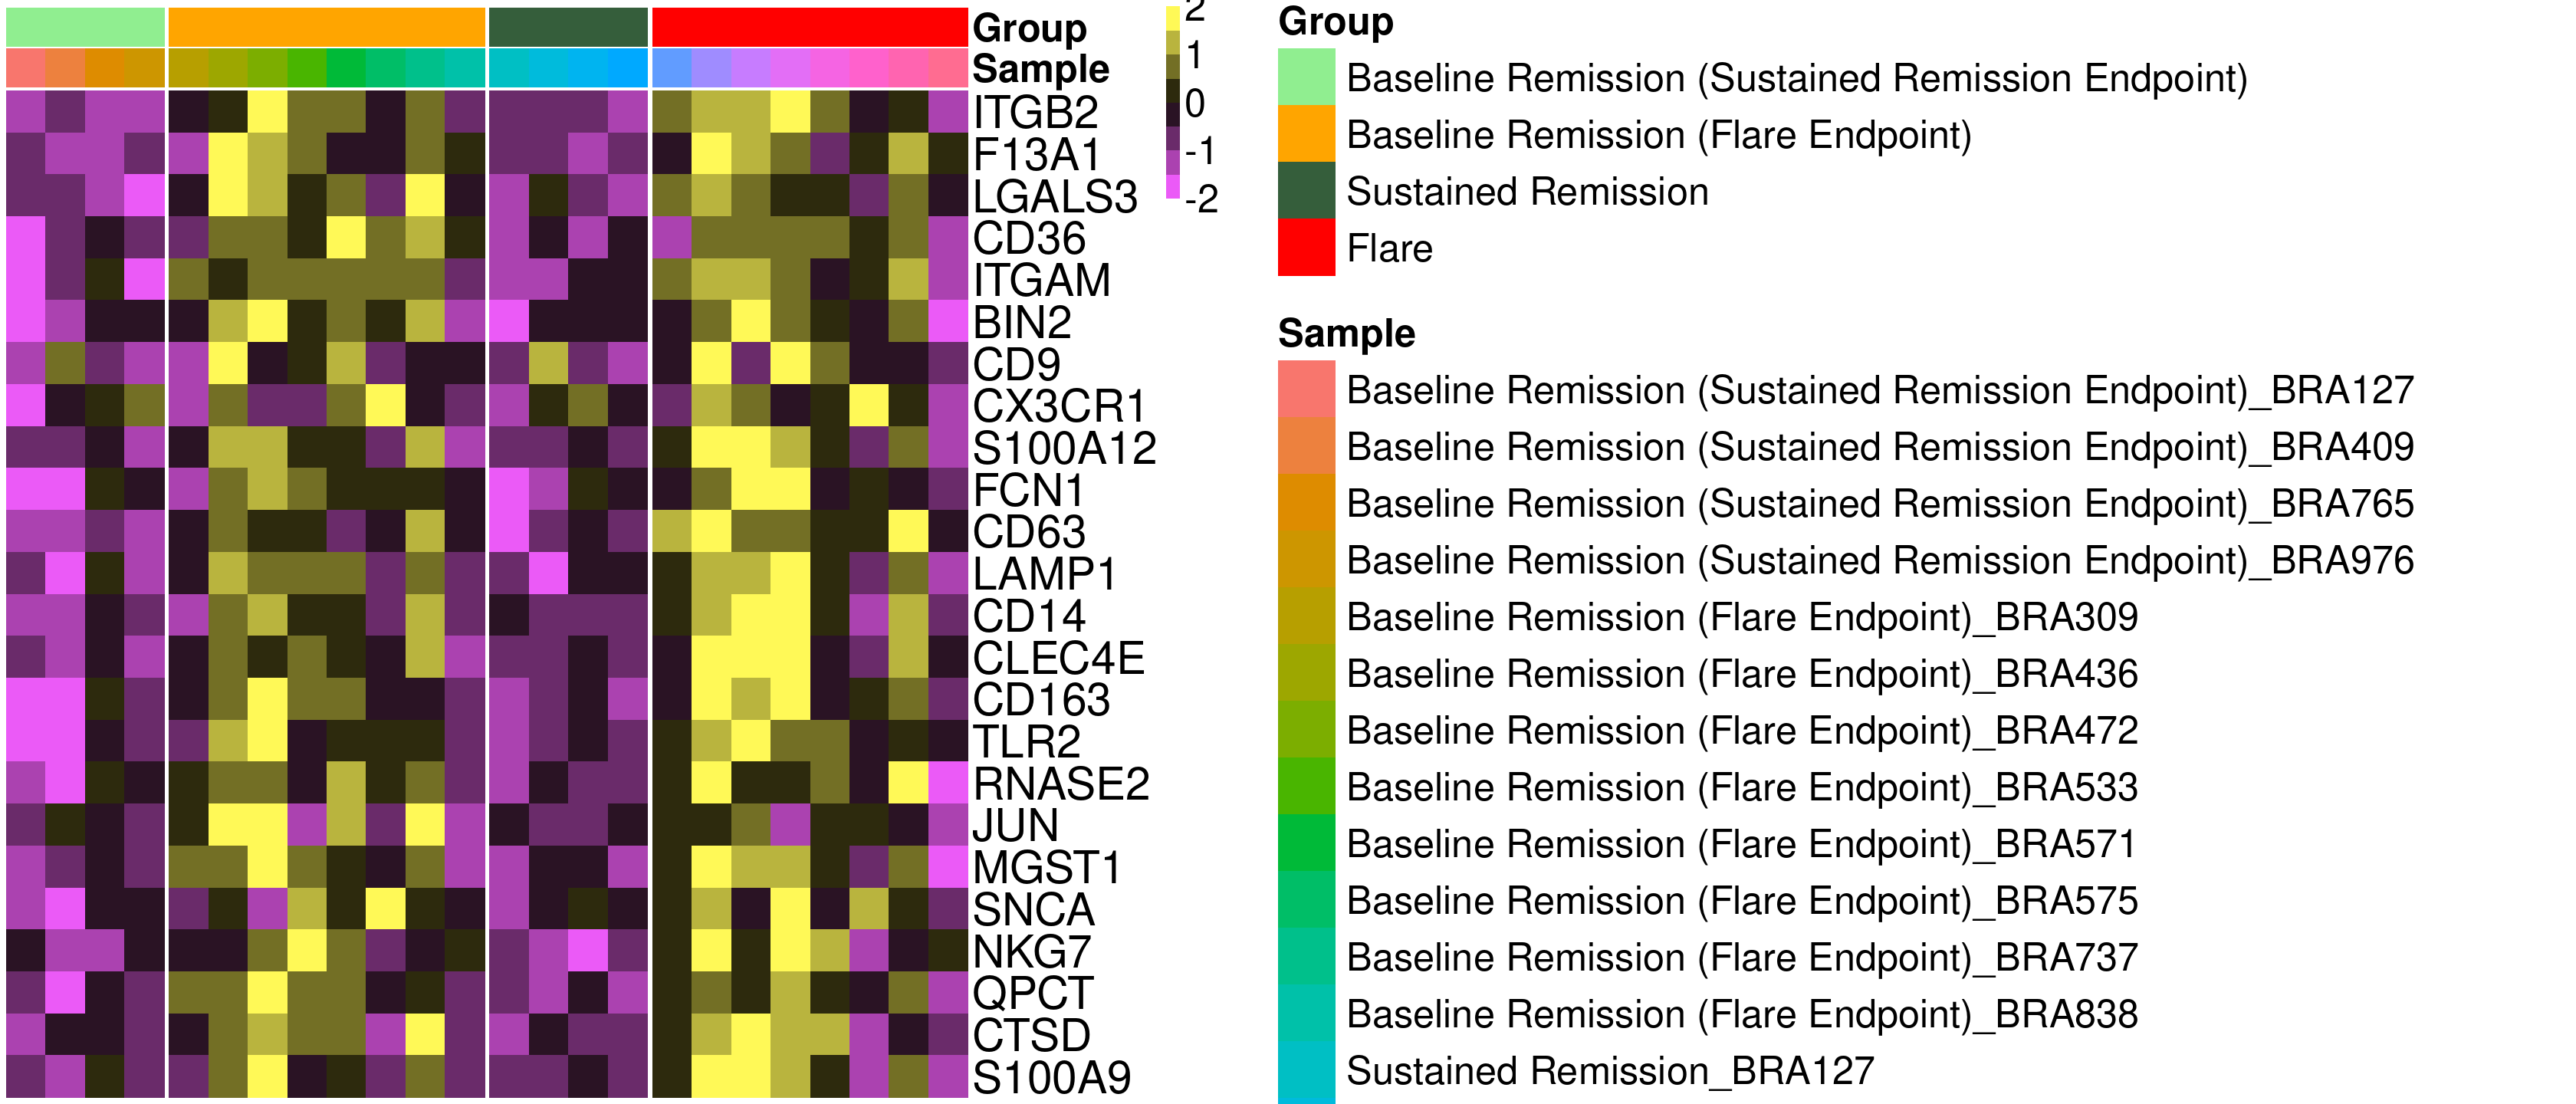

In [104]:
options(repr.plot.width=28, repr.plot.height=12)
#Generate heatmap
heatmap <- pheatmap(
  mat = data,
  border_color = NA,
  color = colorRampPalette(c("#EB5AF7","#0B0801","#FFF957"))(8),
  show_rownames = TRUE,
  show_colnames = FALSE,
  cluster_rows = FALSE,
  cluster_cols = FALSE,
  annotation_col = annotation_col,
  annotation_colors = metacols,
  fontsize = 30,
  fontsize_row = 35,
  scale = "none",  gaps_col = head(as.numeric(cumsum(table(annotation_col$Group))), -1))